# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Missing Values](#3.5.1_Missing_Values)
      * [3.5.1.1 Total Charges missing values](#3.5.1.1_Total_Charges)
          * [3.5.1.1.1 Replace missing values](#3.5.1.1.1_Replace)
    * [3.5.2 Duplicate Values](#3.5.2_Duplicate_Values)
    * [3.5.3 Define the target variable](#3.5.3_Target_Values)
    * [3.5.4 Delete CustomerID column](#3.5.4_CustomerID)
    * [3.5.5 Summary of Categorical Features](#3.5.5_Categorical)
    * [3.5.6 Change non-numerical values to numerical](#3.5.6_numerical)
      * [3.5.6.1 Label Encoding for Binary Columns](#3.5.6.1_Encoding)
      * [3.5.6.2 One Hot Encoding for Multi-Category Columns](#3.5.6.2_OneHotEncoding)
    * [3.5.7 Churn](#3.5.7_Churn)
  * [3.6 Data Visualization](#3.6_Visualization)
    * [3.6.1 Distribution of Churn](#3.6.1_ChurnDistribution)
    * [3.6.2 Distribution of numerical variables](#3.6.2_Distribution)
    * [3.6.3 Churn vs other columns](#3.6.3_Churn_vs)
    * [3.6.4 Monthly Charges Distribution by Contract Type](#3.6.4_Monthly)
    * [3.6.5 Pairplot for a subset of features](#3.6.5_Pairplot)
    * [3.6.6 Heatmap](#3.6.6_Heatmap)
  * [3.7 Summary](#3.7_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

This notebook provides a comprehensive exploratory data analysis (EDA) of a customer churn dataset. The analysis aims to identify key patterns and insights that contribute to customer churn. By examining various features such as demographics, account information, and service usage, the notebook helps understand the factors that influence customer churn.

## 3.3 Imports<a id='3.3_Imports'></a>

In [357]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

#from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [358]:
churn_data = pd.read_csv('churn_data_cleaned.csv')

## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

In [359]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   int64  
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

**Missing Values:** 'Total Charges' has 11 missing values. 'Churn' has 544 missing values.
**Numerical Variables:** The columns tenure, Monthly Charges, and Total Charges have numerical values  and many of the columns are categorical.

In [360]:
# Display the shape of the dataframe
churn_data.shape

(7043, 21)

In [361]:
# Display the first few rows of the dataframe
churn_data.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [362]:
# Display the data types of each column
print(churn_data.dtypes)

CustomerID            object
Gender                 int64
Senior Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object


In [363]:
# Display summary statistics
print(churn_data.describe())

            Gender  Senior Citizen       Tenure  Monthly Charges  \
count  7043.000000     7043.000000  7043.000000      7043.000000   
mean      0.504756        0.162147    32.371149        64.761692   
std       0.500013        0.368612    24.559481        30.090047   
min       0.000000        0.000000     0.000000        18.250000   
25%       0.000000        0.000000     9.000000        35.500000   
50%       1.000000        0.000000    29.000000        70.350000   
75%       1.000000        0.000000    55.000000        89.850000   
max       1.000000        1.000000    72.000000       118.750000   

       Total Charges  
count    7032.000000  
mean     2283.300441  
std      2266.771362  
min        18.800000  
25%       401.450000  
50%      1397.475000  
75%      3794.737500  
max      8684.800000  


**Gender** has 0 and 1 values for female and male. The mean value of approximately 0.505 indicates a roughly equal distribution of male and female customers. The percentiles also show that the dataset is balanced, with the median indicating that half of the customers are male.

**SeniorCitizen** is a categorical variable with 0, 1 values. The mean of SeniorCitizen (0.162) indicates that around 16% of the customers are senior citizens. The data is heavily skewed towards non-senior citizens, as indicated by the percentiles and the fact that the median is 0.

**Tenure:** The mean of tenure is 32 months, with a standard deviation of around 25 months, indicating a wide range of customer tenures. The data shows that 75% of the customers have a tenure of 55 months or less, with the maximum tenure being 72 months.

**Monthly Charges:** The average monthly charge is USD 64.76, with a standard deviation of about USD 30.09. The distribution shows that 25% of customers pay less than USD 35.50, while 25% pay more than USD 89.85 per month. The maximum monthly charge is USD 118.75.

**Total Charges:** The mean total charge is approximately USD 2283.30, with a standard deviation of around USD 2266.77, indicating a wide range of total charges. The data shows that 25% of customers have total charges less than USD 401.45, and 25% have total charges more than USD 3794.74. The maximum total charge is USD 8684.80. The count being less than 7043 indicates the presence of some missing values.

### 3.5.1 Missing Values<a id='3.5.1_Missing_Values'></a>

In [364]:
# Check for missing values
print(churn_data.isnull().sum())

CustomerID             0
Gender                 0
Senior Citizen         0
Partner                0
Dependents             0
Tenure                 0
Phone Service          0
Multiple Lines         0
Internet Service       0
Online Security        0
Online Backup          0
Device Protection      0
Tech Support           0
Streaming TV           0
Streaming Movies       0
Contract               0
Paperless Billing      0
Payment Method         0
Monthly Charges        0
Total Charges         11
Churn                544
dtype: int64


**Missing Values:** 'Total Charges' has 11 missing values. 'Churn' has 544 missing values. Numerical Variables: The columns tenure, Monthly Charges, and Total Charges have numerical values and many of the columns are categorical.

#### 3.5.1.1 Total Charges missing values<a id='3.5.1.1_Total_Charges'></a>

In [365]:
churn_data[churn_data['Total Charges'].isna()]

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,4472-LVYGI,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,1,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,0,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,0,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,0,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,NaN


In [366]:
churn_data[churn_data['Total Charges'].isna()]

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,4472-LVYGI,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,1,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,0,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,0,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,0,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,NaN


The analysis shows that 'Total Charges' is NaN when 'Tenure' is 0. This means customers with 0 tenure haven't been charged yet. The next step is to replace these NaN values with 0.

##### 3.5.1.1.1 Replace missing values <a id='3.5.1.1.1_Replace'></a>

In [367]:
Missing_TotalCharges = churn_data[churn_data['Total Charges'].isna()]

churn_data.loc[churn_data['Tenure'] == 0, 'Total Charges'] = 0

churn_data[churn_data['Tenure']== 0]

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,4472-LVYGI,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,1,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,0,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,0,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,0,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,NaN


There are no longer any missing values.

### 3.5.2 Duplicate Values<a id='3.5.2_Duplicate_Values'></a>

In [368]:
print("Number of records: ", len(churn_data.index))
print("Number of duplicate records: ", len(churn_data.drop_duplicates().index))

Number of records:  7043
Number of duplicate records:  7043


### 3.5.3 Define the target variable <a id='3.5.3_Target_Values'></a>

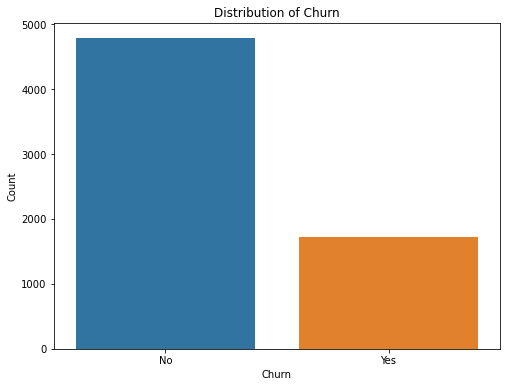

In [369]:
# Univariate Analysis - Distribution of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=churn_data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [370]:
churn_data[churn_data['Churn'] == 2]

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


The target variable in this dataset is 'Churn' that indicates whether customers has discontinued their service with the company. It is a categorical variable with two possible values: Yes and No.

### 3.5.4 Delete CustomerID column<a id='3.5.4_CustomerID'></a>

In [371]:
del churn_data["CustomerID"]

**CustomerID** is a unique identifier that does not provide any meaningful information regarding the customer's churn behavior or other characteristics. It is removed because it does not contribute to the predictive modeling or analysis.

###  3.5.5 Summary of Categorical Features<a id='3.5.5_Categorical'></a>

In [372]:
churn_data.describe(include=['object']).T

,count,unique,top,freq
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
Phone Service,7043,2,Yes,6361
Multiple Lines,7043,3,No,3390
Internet Service,7043,3,Fiber optic,3096
Online Security,7043,3,No,3498
Online Backup,7043,3,No,3088
Device Protection,7043,3,No,3095
Tech Support,7043,3,No,3473
Streaming TV,7043,3,No,2810


In [373]:
# Display the first few rows of the dataframe
churn_data.describe(include=['object']).head()

,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,6499
unique,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,4784


### 3.5.6 Change non-numerical values to numerical<a id='3.5.6_numerical'></a>

#### 3.5.6.1 Label Encoding for Binary Columns<a id='3.5.6.1_Encoding'></a>

In [374]:
label_encoder = LabelEncoder()

binary_cols = ['Gender', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn']

for col in binary_cols:
    churn_data[col] = label_encoder.fit_transform(churn_data[col])

#### 3.5.6.2 One Hot Encoding for Multi-Category Columns<a id='3.5.6.2_OneHotEncoding'></a>

In [375]:
'''
one_hot_cols = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                'Contract', 'Payment Method']

# Apply one-hot encoding
churn_data = pd.get_dummies(churn_data, columns=one_hot_cols, drop_first=True)
'''

"\none_hot_cols = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',\n                'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',\n                'Contract', 'Payment Method']\n\n# Apply one-hot encoding\nchurn_data = pd.get_dummies(churn_data, columns=one_hot_cols, drop_first=True)\n"

These transformations make the dataset suitable for machine learning algorithms that require numerical input, enhancing the dataset's utility for predictive modeling and analysis.

In [376]:
churn_data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


#### 3.5.6.3 Change datatype for 'object' columns<a id='3.5.6.3_datatype'></a>

In [377]:
churn_data.dtypes

Gender                 int64
Senior Citizen         int64
Partner                int32
Dependents             int32
Tenure                 int64
Phone Service          int32
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing      int32
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                  int32
dtype: object

### 3.5.7 Churn <a id='3.5.7_Churn'></a>

In [378]:
# Display the unique values and their counts in the 'Churn' column
churn_counts = churn_data['Churn'].value_counts()

for value, count in churn_counts.items():
    print(f'Value: {value}, Count: {count}')

Value: 0, Count: 4784
Value: 1, Count: 1715
Value: 2, Count: 544


The presence of a value equal to 2 in the 'Churn' column is unexpected and indicates a data integrity issue.  This anomaly needs to be addressed to ensure the accuracy of our analysis.

## 3.6 Data Visualization <a id='3.6_Visualization'></a>

### 3.6.1 Distribution of Churn <a id='3.6.1_ChurnDistribution'></a>

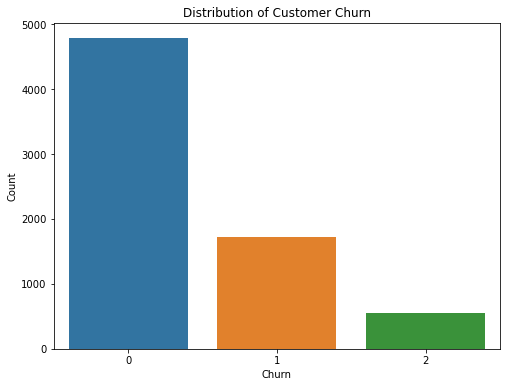

In [379]:
# 
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=churn_data)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### 3.6.2 Distribution of numerical variables <a id='3.6.2_Distribution'></a>

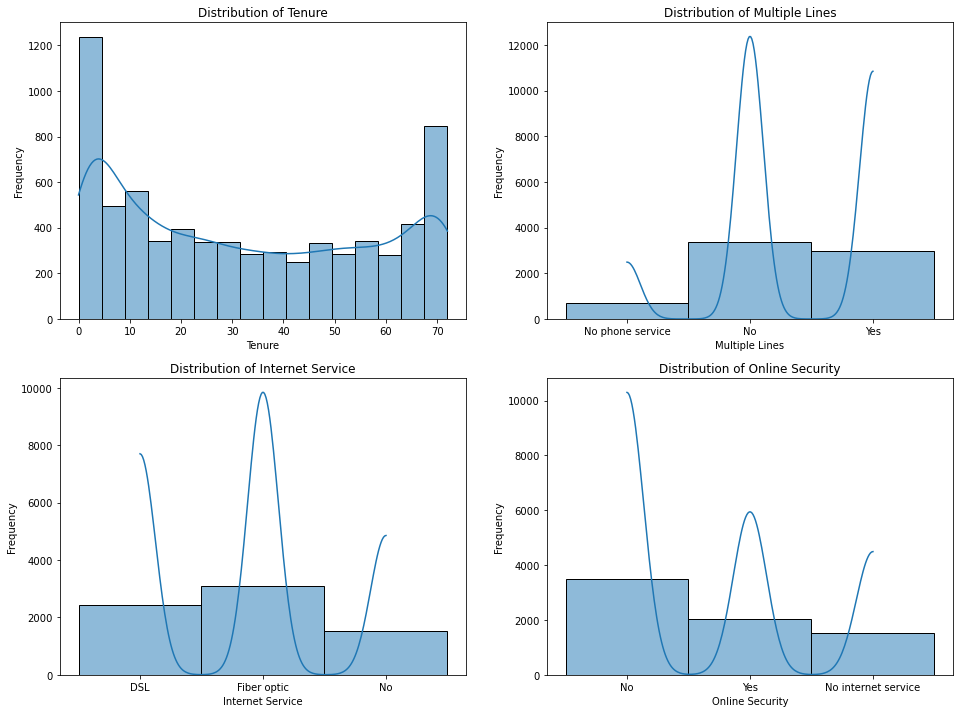

In [391]:
def plot_histograms(data, columns, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
    axes = axes.flatten()
    
    for ax, col in zip(axes, columns):
        sns.histplot(data[col], kde=True, ax=ax)
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    
    plt.show()

none_binary_cols = [col for col in churn_data.columns if churn_data[col].nunique() != 2]
plot_histograms(churn_data, none_binary_cols, n_rows=2, n_cols=2)

**Tenure**
- There is a significant peak at the beginning (0 months), indicating many customers have a very short tenure.
- The frequency gradually decreases and stabilizes across other tenure lengths, with a slight increase towards the higher end (60-70 months).
- This suggests that while many customers leave shortly after joining, a considerable number stay for a longer period.

**Monthly Charges**
- There is a prominent peak at the lower end, indicating that many customers are paying lower monthly charges.
- The distribution is right-skewed with several customers paying higher monthly charges, but the frequency decreases as charges increase.
- This pattern suggests that the company has a larger customer base with lower monthly charges and fewer customers with higher charges.

**Total Charges**
- There is a significant peak at the lower end, indicating many customers have low total charges.
- The distribution tails off gradually with increasing total charges.
- This aligns with the observation from the Tenure distribution, as customers with short tenures would naturally have lower total charges.

**Churn**
- The peak at 0 is significantly higher, indicating that most customers have not churned.
- The 'Churn' column should only contain binary values (0 and 1) to represent whether a customer has churned or not.

### 3.6.3 Churn vs other columns<a id='3.6.3_Churn_vs'></a>

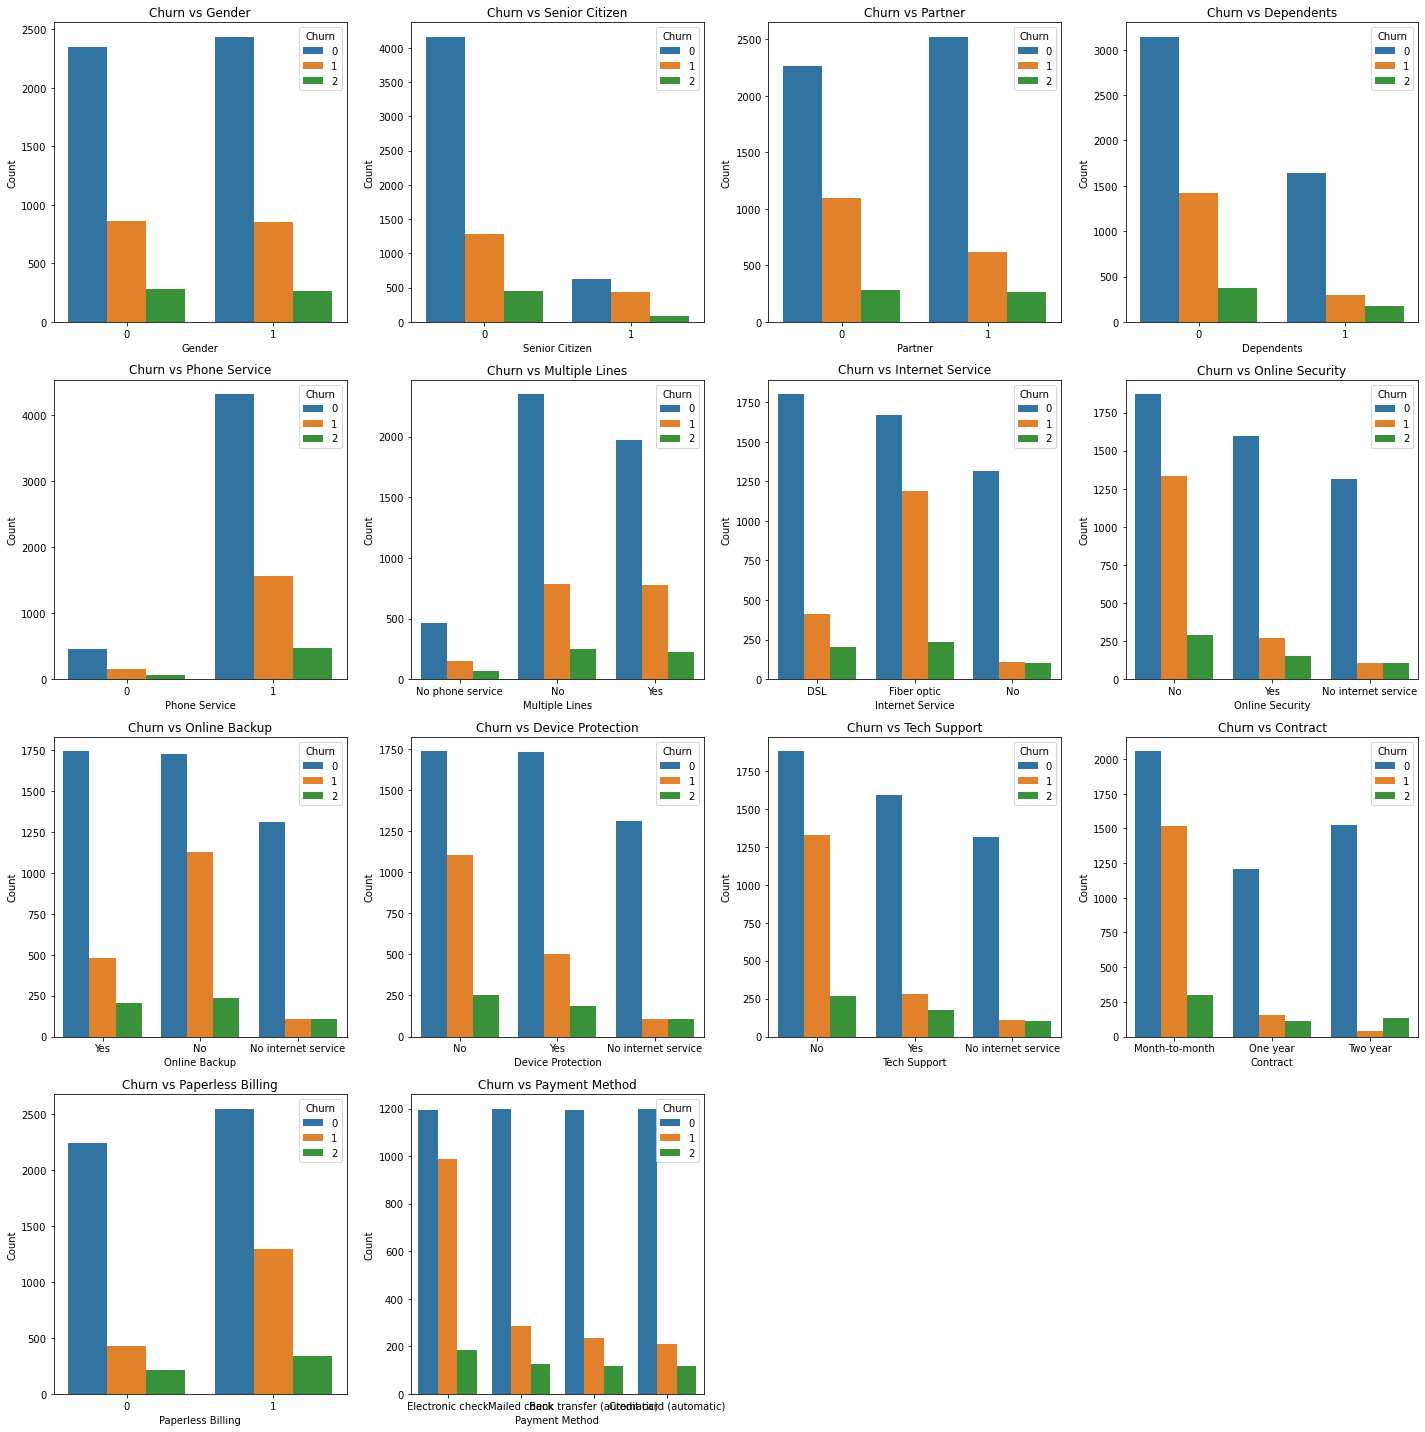

In [381]:
# List of columns to plot
num_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 
               'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
               'Contract', 'Paperless Billing', 'Payment Method']

# Set up the number of columns for the subplot grid
n_cols = 4
n_rows = (len(num_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

# Generate count plots
for i, col in enumerate(num_columns):
    sns.countplot(hue='Churn', x=col, data=churn_data, ax=axes[i])
    axes[i].set_title(f'Churn vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The above graphs indicate that:

**Gender:** There is no significant difference in customer churn between genders.

**Senior Citizen:** Senior citizens have a lower likelihood of churning.

**Partner:** Customers without partners have a higher churn rate compared to those with partners.

**Dependents:** Customers without dependents are more likely to churn compared to those with dependents. 

**Phone Service:** Customers with phone service have a higher churn rate compared to those without phone service.

**Multiple Lines:** Customers with no phone service have the lowest churn rate. The churn behavior between customers with multiple lines and those 'without multiple lines and with phone service' is similar, indicating that phone service plays a crucial role in churn.

**Internet Service:** Customers with fiber optic internet service are the most likely to churn. This could indicate dissatisfaction with the service or higher competition in this segment.

**Online Security:** Customers without online security services are more likely to churn. This indicates that online security services play a crucial role in customer retention.

**Online Backup:** Customers without online backup services are more likely to churn. This indicates that online backup services play a crucial role in customer retention.

**Device Protection:** Customers without device protection services are more likely to churn.

**Tech Support:** Customers without tech support services have a higher likelihood of churning.

**Contract:** Customers with longer-term contracts are less likely to churn compared to those on month-to-month contracts.

**Paperless Billing:** Customers using paperless billing have a higher churn rate comparing to those who do not.

**Payment Method:** Customers using electronic checks have a significantly higher churn rate compared to other payment methods.
    

### 3.6.4 Monthly Charges Distribution by Contract Type<a id='3.6.4_Monthly'></a>

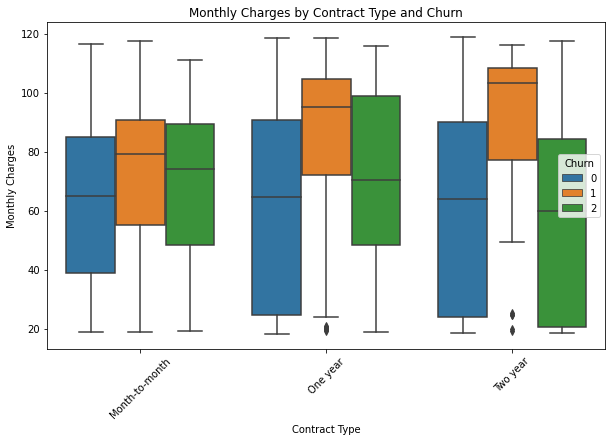

In [382]:
 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='Monthly Charges', hue='Churn', data=churn_data)
plt.title('Monthly Charges by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.xticks(rotation=45)
plt.show()

### 3.6.5 Pairplot for a subset of features<a id='3.6.5_Pairplot'></a>

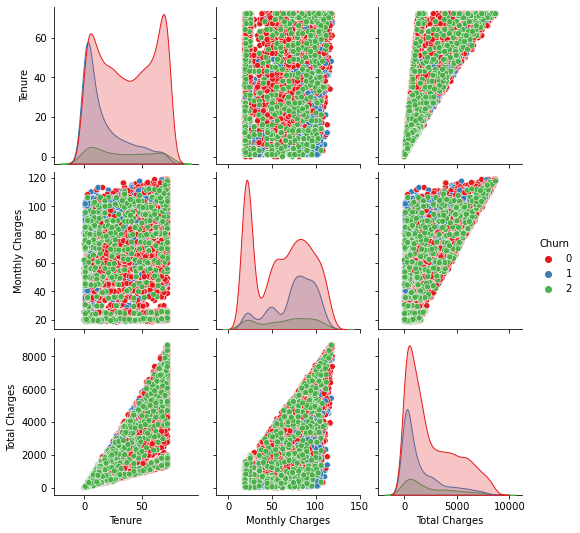

In [383]:
subset = churn_data[['Tenure', 'Monthly Charges', 'Total Charges', 'Churn']]
sns.pairplot(subset, hue='Churn', palette='Set1')
plt.show()

### 3.6.6 Heatmap <a id='3.6.6_Heatmap'></a>

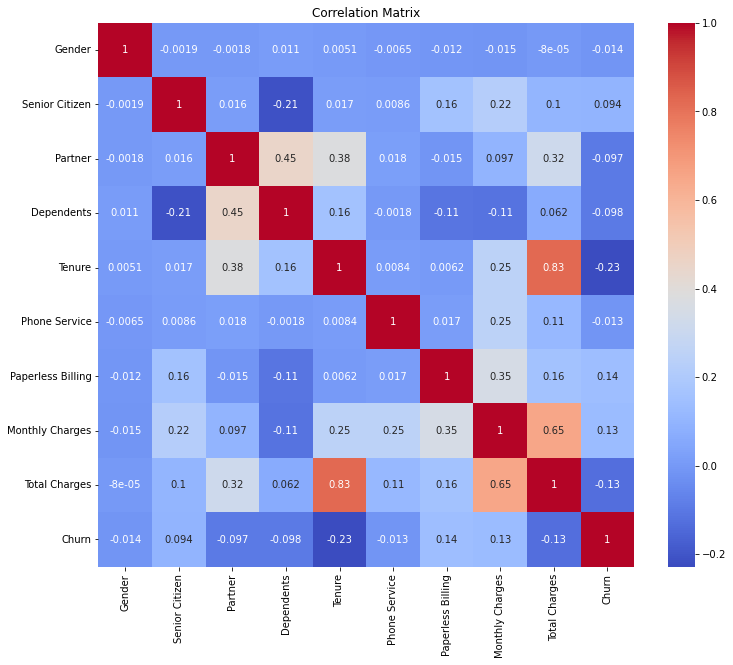

In [384]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
corr = churn_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Tenure vs. Total Charges:** There is a strong positive correlation (0.83) between tenure and total charges. This makes sense as customers who have been with the service longer tend to accumulate higher total charges.

**Senior Citizen vs. Monthly Charges:** There is a moderate positive correlation (0.22) between being a senior citizen and monthly charges. Senior citizens tend to have higher monthly charges.

**Paperless Billing vs. Monthly Charges:** There is a moderate positive correlation (0.35) between using paperless billing and higher monthly charges. Customers who opt for paperless billing might be more inclined towards digital services, which could be costlier.

**Tenure vs Churn:** There is a moderate negative correlation (-0.23) between tenure and churn. Customers with longer tenures are less likely to churn, indicating customer loyalty over time.

**Dependents vs Partner:** There is a moderate positive correlation (0.45) between having dependents and having a partner, which is expected.

**Monthly Charges vs Total Charges:** There is a positive correlation (0.65) between monthly charges and total charges, which is intuitive as higher monthly charges contribute to higher total charges over time.

**Churn:** The churn variable has weak correlations with most features, with the highest being a negative correlation with tenure (-0.23), indicating that customers with longer tenures are less likely to churn. Other features like paperless billing, monthly charges, and total charges show slight positive correlations with churn.

## 3.7 Summary <a id='3.7_Summary'></a>

The EDA reveals significant insights into customer churn patterns. Key findings include the higher churn rate among customers with month-to-month contracts, those using paperless billing, and those without tech support services. Visualizations such as histograms, scatter plots, and heatmaps effectively highlight these trends, providing a clear understanding of the data and guiding further analysis and modeling efforts.

In [385]:
churn_data.head().T

,0,1,2,3,4
Gender,0,1,1,1,0
Senior Citizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
Tenure,1,34,2,45,2
Phone Service,0,1,1,0,1
Multiple Lines,No phone service,No,No,No phone service,No
Internet Service,DSL,DSL,DSL,DSL,Fiber optic
Online Security,No,Yes,Yes,Yes,No
Online Backup,Yes,No,Yes,No,No


In [ ]:
# Save the data 
datapath = '/data'
save_file(ski_data, 'churn_data_step3_features.csv', datapath)